# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#import openweathermapy

In [2]:
# Output File (CSV)
output_datafile = "outputdata/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city by passing lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # append unique city to the list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 609 cities found from random geo-coordinates.


# Create a set of random lat and lng combinations

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
unit = "Imperial"

#api_key = "enter api key to execute"

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : weather_api_key,
         "units" : unit}

# Create DataFrame with below parameters
city_weather_df = pd.DataFrame(columns=["City",
                                        "Cloudiness(%)",
                                        "Country",
                                        "Date",
                                        "Humidity(%)",
                                        "Lat",
                                        "Lng", 
                                        "Max Temp(F)",
                                        "Wind Speed(mph)"])

# get local current time
def current_date():
    localtime = time.asctime( time.localtime(time.time()) )
    return localtime.split(' ')[1]+"/"+localtime.split(' ')[2]+"/"+localtime.split(' ')[4]


print("Beginning Data Retrieval")
print("-----------------------------------")


# store each city weather information on DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    
    # Perform a weather check on each of the cities using a series of successive API calls    
    data = requests.get(base_url, params=param).json()
    try:
        city_weather_df.loc[i, "City"] = data["name"]
        city_weather_df.loc[i, "Cloudiness(%)"] = data["clouds"]["all"]
        city_weather_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_df.loc[i, "Date"] = current_date()
        city_weather_df.loc[i, "Humidity(%)"] = data["main"]["humidity"]
        city_weather_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_df.loc[i, "Max Temp(F)"] = data["main"]["temp_max"]
        city_weather_df.loc[i, "Wind Speed(mph)"] = data["wind"]["speed"]
        
        i += 1
        # Include a print log of each city as it's being processed with the city number and city name.
        print("Processing Record {:3d} of set {} | {} ".format(i, len(cities), data['name']))
              
    except KeyError:
        print("(Total {} cities out of {} not found...) ".format(not_found + 1, len(cities)))
        not_found += 1

print(f"""
-------------------------------------------
Data Retrieval Completed
-------------------------------------------""")

Beginning Data Retrieval
-----------------------------------
Processing Record   1 of set 610 | San Patricio 
Processing Record   2 of set 610 | Butaritari 
Processing Record   3 of set 610 | Nouadhibou 
Processing Record   4 of set 610 | Carnarvon 
Processing Record   5 of set 610 | Mar del Plata 
Processing Record   6 of set 610 | Kommunisticheskiy 
Processing Record   7 of set 610 | Busselton 
Processing Record   8 of set 610 | Mataura 
Processing Record   9 of set 610 | Saint Paul Harbor 
(Total 1 cities out of 610 not found...) 
(Total 2 cities out of 610 not found...) 
Processing Record  10 of set 610 | Newport 
Processing Record  11 of set 610 | Ushuaia 
Processing Record  12 of set 610 | Hasaki 
Processing Record  13 of set 610 | Albany 
Processing Record  14 of set 610 | San Luis 
Processing Record  15 of set 610 | Ligayan 
Processing Record  16 of set 610 | Abhā 
(Total 3 cities out of 610 not found...) 
Processing Record  17 of set 610 | Ribeira Grande 
(Total 4 cities out o

Processing Record 166 of set 610 | Edd 
Processing Record 167 of set 610 | Yellowknife 
Processing Record 168 of set 610 | Airai 
Processing Record 169 of set 610 | Mehamn 
Processing Record 170 of set 610 | Atar 
Processing Record 171 of set 610 | Berbera 
Processing Record 172 of set 610 | Wawa 
Processing Record 173 of set 610 | Grindavik 
Processing Record 174 of set 610 | Santiago 
Processing Record 175 of set 610 | Altamira 
Processing Record 176 of set 610 | Oistins 
Processing Record 177 of set 610 | Olinda 
Processing Record 178 of set 610 | Bahía Blanca 
Processing Record 179 of set 610 | Thompson 
Processing Record 180 of set 610 | Clyde River 
Processing Record 181 of set 610 | Codrington 
Processing Record 182 of set 610 | Lukovetskiy 
Processing Record 183 of set 610 | Honningsvåg 
Processing Record 184 of set 610 | San Ignacio Río Muerto 
Processing Record 185 of set 610 | Biltine 
Processing Record 186 of set 610 | Natá 
Processing Record 187 of set 610 | Luau 
Processi

Processing Record 327 of set 610 | Praia 
Processing Record 328 of set 610 | Saskylakh 
Processing Record 329 of set 610 | Kyabram 
Processing Record 330 of set 610 | Pāsighāt 
Processing Record 331 of set 610 | Zlynka 
Processing Record 332 of set 610 | Arden 
Processing Record 333 of set 610 | Matamoros 
Processing Record 334 of set 610 | Zhezkazgan 
Processing Record 335 of set 610 | Reconquista 
(Total 39 cities out of 610 not found...) 
Processing Record 336 of set 610 | Japura 
Processing Record 337 of set 610 | Salina 
Processing Record 338 of set 610 | Severo-Kuril'sk 
Processing Record 339 of set 610 | Businga 
Processing Record 340 of set 610 | Mogadishu 
Processing Record 341 of set 610 | Bariloche 
Processing Record 342 of set 610 | Palana 
Processing Record 343 of set 610 | Lagoa 
Processing Record 344 of set 610 | São Miguel do Araguaia 
Processing Record 345 of set 610 | Ferme-Neuve 
Processing Record 346 of set 610 | Champerico 
Processing Record 347 of set 610 | Vardø 

Processing Record 494 of set 610 | Whitecourt 
Processing Record 495 of set 610 | Otavi 
Processing Record 496 of set 610 | Alibag 
Processing Record 497 of set 610 | Province of Mantua 
Processing Record 498 of set 610 | Presidencia Roque Sáenz Peña 
Processing Record 499 of set 610 | Smolenka 
Processing Record 500 of set 610 | Klaksvík 
Processing Record 501 of set 610 | Warri 
Processing Record 502 of set 610 | Faya 
(Total 54 cities out of 610 not found...) 
Processing Record 503 of set 610 | Gushikawa 
Processing Record 504 of set 610 | Zig 
Processing Record 505 of set 610 | Vangaindrano 
Processing Record 506 of set 610 | Byron Bay 
Processing Record 507 of set 610 | Geraldton 
Processing Record 508 of set 610 | Leh 
Processing Record 509 of set 610 | Guarujá 
Processing Record 510 of set 610 | Nova Prata 
Processing Record 511 of set 610 | Waipawa 
Processing Record 512 of set 610 | Taltal 
Processing Record 513 of set 610 | Charlestown 
Processing Record 514 of set 610 | Sang

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

# Save CSV of all data retrieved
city_weather_df.to_csv(output_data_file)
city_weather_df.count()

In [6]:
#Display dataframe
city_weather_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp(F),Wind Speed(mph)
0,San Patricio,13,MX,May//22:41:53,67,19.22,-104.7,74.46,5.57
1,Butaritari,44,KI,May//22:41:53,80,3.07,172.79,83.44,17.18
2,Nouadhibou,0,MR,May//22:41:53,72,20.93,-17.03,68,19.46
3,Carnarvon,0,AU,May//22:41:53,15,-24.87,113.63,82.4,11.41
4,Mar del Plata,75,AR,May//22:41:54,87,-38,-57.56,57.99,5.82


### Plotting the Data

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

Maximum Humidity 100.00 %
Minimum Humidity 9.00 %
Average Humidity 67.34 %


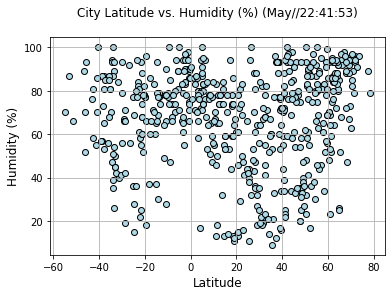

In [7]:
font = 12
lat = city_weather_df['Lat']
humidity = city_weather_df['Humidity(%)']
date = city_weather_df['Date'][1]

# Print analysis
print ("Maximum Humidity {:.2f} %".format(humidity.max()))
print ("Minimum Humidity {:.2f} %".format(humidity.min()))
print ("Average Humidity {:.2f} %".format(humidity.mean()))

plt.grid(True)
# create scatter plot for humidity by city latitude
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Humidity (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Humidity (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

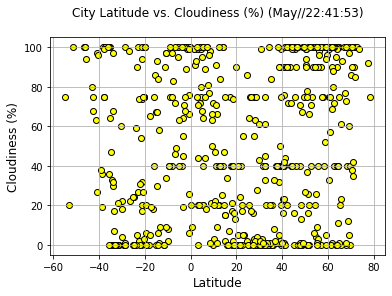

In [8]:
font = 12
lat = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness(%)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for cloudiness by city latitude
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Cloudiness (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Cloudiness (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

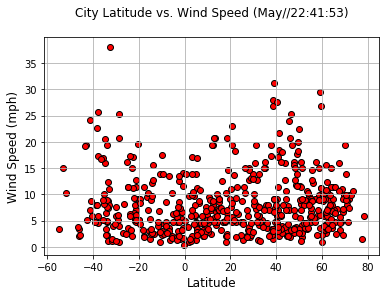

In [9]:
font = 12
lat = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed(mph)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for wind speed mph by city latitude
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Wind Speed (mph)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_wind_speed.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
humidity = city_weather_df['Humidity(%)']
date = city_weather_df['Date'][1]

# Print analysis
print ("Maximum Humidity {:.2f} %".format(humidity.max()))
print ("Minimum Humidity {:.2f} %".format(humidity.min()))
print ("Average Humidity {:.2f} %".format(humidity.mean()))

plt.grid(True)
# create scatter plot for humidity by city latitude
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Humidity (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Humidity (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_humidity.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed(mph)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for wind speed mph by city latitude
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Wind Speed (mph)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_wind_speed.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
max_temp = city_weather_df['Max Temp(F)']
date = city_weather_df['Date'][0]

# Print analysis
print ("Minimum Temprature is {:.2f}" .format(max_temp.min()))
print ("Average Temprature is {:.2f}" .format(max_temp.mean()))
print ("Maximun Temprature is {:.2f}" .format (max_temp.max()))  
print ("Their are {} cities temprature are greater than 100 degree (F) \n" .format (city_weather_df[city_weather_df['Max Temp(F)']> 100].count()['City']))
 


plt.grid(True)
# create scatter plot for city latitude with max temprature
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Max Temperature (F)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/max_temp.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness(%)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for cloudiness by city latitude
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Cloudiness (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Cloudiness (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_cloudiness.png")
plt.show()